

Rotations theta B= [0.00429119] and theta C= [-0.00367816].

Reactions: RA= [-2.25287356] , RB= [16.01149425], RC= [20.03448276], RD= [-5.79310345]

Moments: MAB= 0, MBA= [6.75862069], MBC= [-6.75862069], MCB= [7.72413793], MCD= [-7.72413793], MDC= [-3.86206897]

Total stiffness matrix is: 
[[ 8400000.        0.        0. -8400000.        0.        0.        0.        0.        0.        0.        0.        0.]
 [       0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.]
 [       0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.]
 [-8400000.        0.        0. 16800000.        0.        0. -8400000.        0.        0.        0.        0.        0.]
 [       0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.]
 [       0.        0.        0.        0.        0.        0.        0.        0.        0.

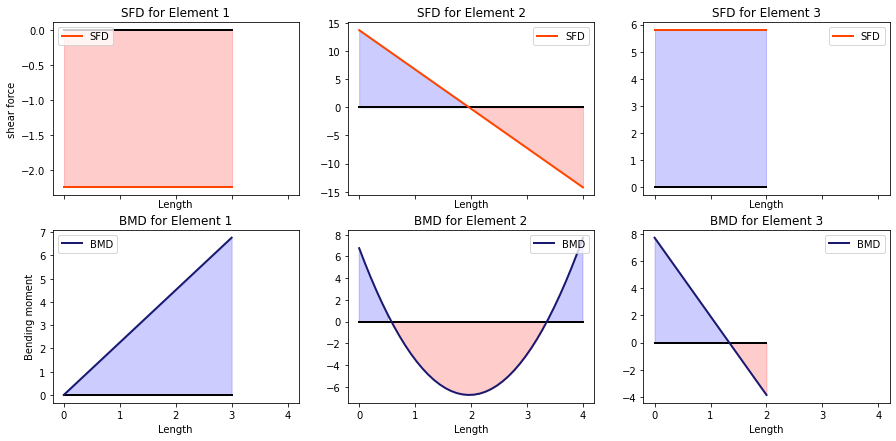

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from tkinter import *

def calculate():

    E = int(entry1.get())
    I = float(entry2.get())
    l1 = int(entry3.get())
    l2 = int(entry4.get())
    l3 = int(entry5.get())
    p = int(entry6.get())

    window.destroy()

    # Form matrices to find theta

    A = np.array([[1.5*E*I+4*E*I/l2 , 2*E*I/l2],
                  [2*E*I/l2, 4*E*I/l2 + 4*E*I/l3]])

    C = np.array([[p * l2 ** 2 /12], [-p * l2 ** 2 / 12]])

    A_INV= np.linalg.inv(A)   # finding inverse
    theta= np.dot(A_INV,C)    # multiplying matrix

    thetaB= theta[0]
    thetaC= theta[1]


    print(f"\nRotations theta B= {thetaB} and theta C= {thetaC}.")

    # clockwise is positive
    M_AB= 0
    M_BA= 1.5*E*I*thetaB
    M_BC= -p*l2**2 /12 + (2*E*I/l2) * (2*thetaB + thetaC)
    M_CB= p*l2**2 /12 + (2*E*I/l2) * (2*thetaC + thetaB)
    M_CD= 4*E*I*thetaC/l3
    M_DC= 2*E*I*thetaC/l3

    # FIND REACTIONS AT A, B AND C
    RB1= M_BA/l1
    RA= 0-RB1
    RC1= ((M_CB+M_BC) + l2*p*l2*0.5)/l2
    RB2 = p*l2 - RC1
    RD= (M_CD+M_DC)/l3
    RC2= 0-RD

    RB= RB1+RB2
    RC= RC1+RC2

    print(f"\nReactions: RA= {RA} , RB= {RB}, RC= {RC}, RD= {RD}")
    print(f'\nMoments: MAB= {M_AB}, MBA= {M_BA}, MBC= {M_BC}, MCB= {M_CB}, MCD= {M_CD}, MDC= {M_DC}')

    # stiffness matrix
    A = 0.06

    k1 = np.array([[E * A / l1, 0, 0, -E * A / l1, 0, 0],
                   [0, 12 * E * I / l1 ** 3, 6 * E * I / l1 ** 2, 0, -12 * E * I / l1 ** 3, 6 * E * I / l1 ** 3],
                   [0, 6 * E * I / l1 ** 2, 4 * E * I / l1, 0, -6 * E * I / l1 ** 2, 2 * E * I / l1],
                   [-E * A / l1, 0, 0, -E * A / l1, 0, 0],
                   [0, -12 * E * I / l1 ** 3, -6 * E * I / l1 ** 2, 0, 12 * E * I / l1 ** 3, -6 * E * I / l1 ** 2],
                   [0, 6 * E * I / l1 ** 2, 2 * E * I / l1, 0, 6 * E * I / l1 ** 2, 4 * E * I / l1]])

    T1 = np.array([[1, 0, 0, -1, 0, 0],
                   [0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0],
                   [-1, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0]])

    T2 = T1

    K1 = np.dot(np.transpose(T1), k1)
    KG1 = np.dot(K1, T1)

    KG2 = KG1
    KG3 = KG1

    TSM = np.zeros((12, 12))
    np.set_printoptions(edgeitems=12, linewidth=10000)
    TSM[0:6, 0:6] += KG1[0:6, 0:6]
    TSM[3:6, 3:6] += KG2[0:3, 0:3]
    TSM[3:6, 6:9] += KG2[0:3, 3:6]
    TSM[6:9, 6:9] += KG2[3:6, 3:6]
    TSM[6:9, 6:9] += KG3[0:3, 0:3]
    TSM[9:12, 6:9] += KG3[3:6, 0:3]
    TSM[6:9, 9:12] += KG2[0:3, 3:6]
    TSM[9:12, 9:12] += KG2[3:6, 3:6]

    print(f'\nTotal stiffness matrix is: \n{np.round(TSM, 2)}')

    # Shear force
    x1 = np.linspace(start=0, num=40, stop=l1)
    x2 = np.linspace(start=0, num=40, stop=l2)
    x3 = np.linspace(start=0, num=40, stop=l3)

    SF_AB= RA +x1-x1
    SF_BC= RA+RB-x2*p
    SF_CD= RA+RB+RC-p*l2+x3-x3

    # bending moment
    BM_AB = -RA*x1
    BM_BC = -(RA*(l1+x2)+RB*x2 - p*x2**2 /2)
    BM_CD = -(RA*(l1+l2+x3)+RB*(l2+x3) + RC*(x3) -p*l2*(l2/2 + x3))


    # PLOTTING SFD AND BMD
    fig, ((ax1, ax2, ax3), (ax4,ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True)
    fig.set_size_inches(15, 7)
    ax1.plot(x1, 0 * x1, color='black',linewidth=2)
    ax1.plot(x1, SF_AB, label='SFD', color="orangered",linewidth=2)  # Plot some data on the axes.
    ax1.fill_between(x1, SF_AB, alpha=0.2, color='red',where=(SF_AB<=0))
    ax1.fill_between(x1, SF_AB, alpha=0.2, color='blue',where=(SF_AB>=0))
    ax1.set_xlabel('Length')  # Add an x-label to the axes.
    ax1.set_ylabel('shear force')  # Add a y-label to the axes.
    ax1.set_title("SFD for Element 1")  # Add a title to the axes.
    ax1.legend(loc='upper left')  # Add a legend.

    ax4.plot(x1, 0 * x1, color='black',linewidth=2)
    ax4.plot(x1, BM_AB, label='BMD', color="midnightblue",linewidth=2)  # Plot some data on the axes.
    ax4.fill_between(x1, BM_AB, alpha=0.2, color='red',where=(BM_AB<=0))
    ax4.fill_between(x1, BM_AB, alpha=0.2, color='blue',where=(BM_AB>=0))
    ax4.set_xlabel('Length')  # Add an x-label to the axes.
    ax4.set_ylabel('Bending moment')  # Add a y-label to the axes.
    ax4.set_title("BMD for Element 1")  # Add a title to the axes.
    ax4.legend(loc='upper left')  # Add a legend.

    ax2.plot(x2, 0 * x2, color='black',linewidth=2)
    ax2.plot(x2, SF_BC, label='SFD', color="orangered",linewidth=2)  # Plot some data on the axes.
    ax2.fill_between(x2, SF_BC, alpha=0.2, color='blue',where=(SF_BC>=0))
    ax2.fill_between(x2, SF_BC, alpha=0.2, color='red',where=(SF_BC<=0))
    ax2.set_xlabel('Length')  # Add an x-label to the axes.
    ax2.set_title("SFD for Element 2")  # Add a title to the axes.
    ax2.legend(loc='upper right')  # Add a legend.

    ax5.plot(x2, 0 * x2, color='black',linewidth=2)
    ax5.plot(x2, BM_BC, label='BMD', color="midnightblue",linewidth=2)  # Plot some data on the axes.
    ax5.fill_between(x2, BM_BC, alpha=0.2, color='blue',where=(BM_BC>=0))
    ax5.fill_between(x2, BM_BC, alpha=0.2, color='red',where=(BM_BC<=0))
    ax5.set_xlabel('Length')  # Add an x-label to the axes.
    ax5.set_title("BMD for Element 2")  # Add a title to the axes.
    ax5.legend(loc='upper right')  # Add a legend.

    ax3.plot(x3, 0 * x3, color='black',linewidth=2)
    ax3.plot(x3, SF_CD, label='SFD', color="orangered",linewidth=2)  # Plot some data on the axes.
    ax3.fill_between(x3, SF_CD, alpha=0.2, color='blue',where=(SF_CD>=0))
    ax3.fill_between(x3, SF_CD, alpha=0.2, color='red',where=(SF_CD<=0))
    ax3.set_xlabel('Length')  # Add an x-label to the axes.
    ax3.set_title("SFD for Element 3")  # Add a title to the axes.
    ax3.legend(loc='upper right')  # Add a legend.

    ax6.plot(x3, 0 * x3, color='black',linewidth=2)
    ax6.plot(x3, BM_CD, label='BMD', color="midnightblue",linewidth=2)  # Plot some data on the axes.
    ax6.fill_between(x3, BM_CD, alpha=0.2, color='blue',where=(BM_CD>=0))
    ax6.fill_between(x3, BM_CD, alpha=0.2, color='red',where=(BM_CD<=0))
    ax6.set_xlabel('Length')  # Add an x-label to the axes.
    ax6.set_title("BMD for Element 3")  # Add a title to the axes.
    ax6.legend(loc='upper right')  # Add a legend.

    plt.show()

window = Tk()
window.minsize(width=600, height=600)
window.title("Finding Deflections, SFD and BMD")
window.config(padx=20, pady=20)


label1 = Label(text="Young's modulus \nof the material(E) :")
label1.grid(column=0, row=1)
label1.config(padx=20, pady=15,font=('Arial',11,'normal'))
label2 = Label(text="MOI of C/S ( I ) :")
label2.grid(column=0, row=2)
label2.config(padx=20, pady=15,font=('Arial',11,'normal'))
label3 = Label(text="Length L1 :")
label3.grid(column=0, row=3)
label3.config(padx=20, pady=15,font=('Arial',11,'normal'))
label4 = Label(text="Length L2 :")
label4.grid(column=0, row=4)
label4.config(padx=20, pady=15,font=('Arial',11,'normal'))
label5 = Label(text="Length L3 :")
label5.grid(column=0, row=5)
label5.config(padx=20, pady=15,font=('Arial',11,'normal'))
label6 = Label(text="Load W :")
label6.grid(column=0, row=6)
label6.config(padx=20, pady=15,font=('Arial',11,'normal'))

label6 = Label(text="KN/m2")
label6.grid(column=2, row=1)
label7 = Label(text="m-4")
label7.grid(column=2, row=2)
label8 = Label(text="m")
label8.grid(column=2, row=3)
label9 = Label(text="m")
label9.grid(column=2, row=4)
label10 = Label(text="m")
label10.grid(column=2, row=5)
label11 = Label(text="KN/m")
label11.grid(column=2, row=6)

button = Button(text="Calculate",width=21,font=('Arial',13,'bold'),bg='yellow', command=calculate)
button.grid(column=1, row=7)
button.config(padx=10, pady=5)

entry1 = Entry(width=25)
entry1.focus()
print(entry1.get())
entry1.grid(column=1, row=1)
entry1.insert(END, string=" 210000000")
entry2= Entry(width=25)
entry2.insert(END, string=" 0.000005 ")
entry2.grid(column=1, row=2)
entry3 = Entry(width=25)
entry3.insert(END, string="3")
entry3.grid(column=1, row=3)
entry4 = Entry(width=25)
entry4.insert(END, string="4")
entry4.grid(column=1, row=4)
entry5 = Entry(width=25)
entry5.insert(END, string=" 2 ")
entry5.grid(column=1, row=5)
entry6 = Entry(width=25)
entry6.insert(END, string=" 7 ")
entry6.grid(column=1, row=6)


window.mainloop()




